<a href="https://colab.research.google.com/github/mejian1/ExopherGeneExpressionProfiling/blob/main/genepairsincelegans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   NCBI GeneID   Symbol                                     Description  \
0       190581  nhr-276                 Nuclear Hormone Receptor family   
1       191732   nhr-85   Nuclear hormone receptor family member nhr-85   
2       183768  nhr-169  Nuclear hormone receptor family member nhr-169   
3       184026   nhr-89   Nuclear hormone receptor family member nhr-89   
4       184021  nhr-174  Nuclear hormone receptor family member nhr-174   

        Gene Type  Transcripts Chromosomes Nomenclature ID  \
0  PROTEIN_CODING            1           I  WBGene00013512   
1  PROTEIN_CODING            2           I  WBGene00003675   
2  PROTEIN_CODING            1           I  WBGene00008289   
3  PROTEIN_CODING            1           I  WBGene00003679   
4  PROTEIN_CODING            1           I  WBGene00008474   

  Annotation Genomic Range Accession   genomic_coordinates  \
0                         NC_003279.8             14041627   
1                         NC_003279.8             13

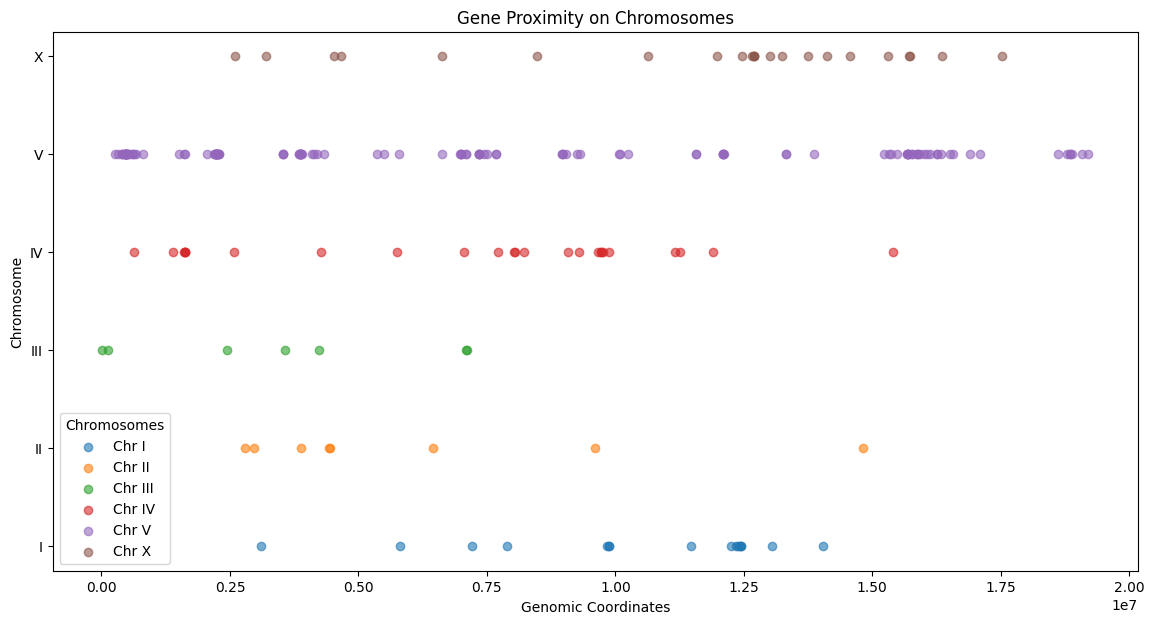

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/NHRGeneFamilyAGP.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Ensure genomic coordinates are numeric for sorting and calculating distances
data['genomic_coordinates'] = pd.to_numeric(data['genomic_coordinates'], errors='coerce')

# Drop rows with NaN values in 'genomic_coordinates' or 'chromosome_number'
data.dropna(subset=['genomic_coordinates', 'Chromosomes'], inplace=True)

# Sort the dataset by chromosome number and genomic coordinates
data.sort_values(by=['Chromosomes', 'genomic_coordinates'], inplace=True)

# Calculate the distances between consecutive genes on the same chromosome
data['distance_to_next'] = data.groupby('Chromosomes')['genomic_coordinates'].diff().shift(-1)

# Display the results
print(data)

# Function to visualize gene proximity
def plot_gene_proximity(df):
    plt.figure(figsize=(14, 7))
    for chromosome in df['Chromosomes'].unique():
        chr_data = df[df['Chromosomes'] == chromosome]
        plt.scatter(chr_data['genomic_coordinates'], [chromosome]*len(chr_data), label=f'Chr {chromosome}', alpha=0.6)
    plt.xlabel('Genomic Coordinates')
    plt.ylabel('Chromosome')
    plt.title('Gene Proximity on Chromosomes')
    plt.legend(title='Chromosomes')
    plt.show()

# Plot gene proximity
plot_gene_proximity(data)

# Define the filename for the output file
output_file_name = 'gene_proximity_analysis.csv'

# Export the dataframe to a CSV file
data.to_csv(output_file_name, index=False)

# Provide a download link for the generated CSV file
from google.colab import files
files.download(output_file_name)


Data loaded successfully. Here are the first few rows:
   NCBI GeneID  Symbol                                        Description  \
0       171884  nhr-64      Nuclear hormone receptor family member nhr-64   
1       172251   nhr-2       Nuclear hormone receptor family member nhr-2   
2       172460  nhr-23      Nuclear hormone receptor family member nhr-23   
3       192082  unc-55                    Nuclear hormone receptor unc-55   
4       172836  nhr-62  NR LBD domain-containing protein;Nuclear hormo...   

        Gene Type  Transcripts Chromosomes Nomenclature ID  \
0  PROTEIN_CODING            3           I  WBGene00003654   
1  PROTEIN_CODING            1           I  WBGene00003601   
2  PROTEIN_CODING            6           I  WBGene00003622   
3  PROTEIN_CODING            2           I  WBGene00006790   
4  PROTEIN_CODING            4           I  WBGene00003652   

  Annotation Genomic Range Accession   genomic_coordinates  \
0                         NC_003279.8          

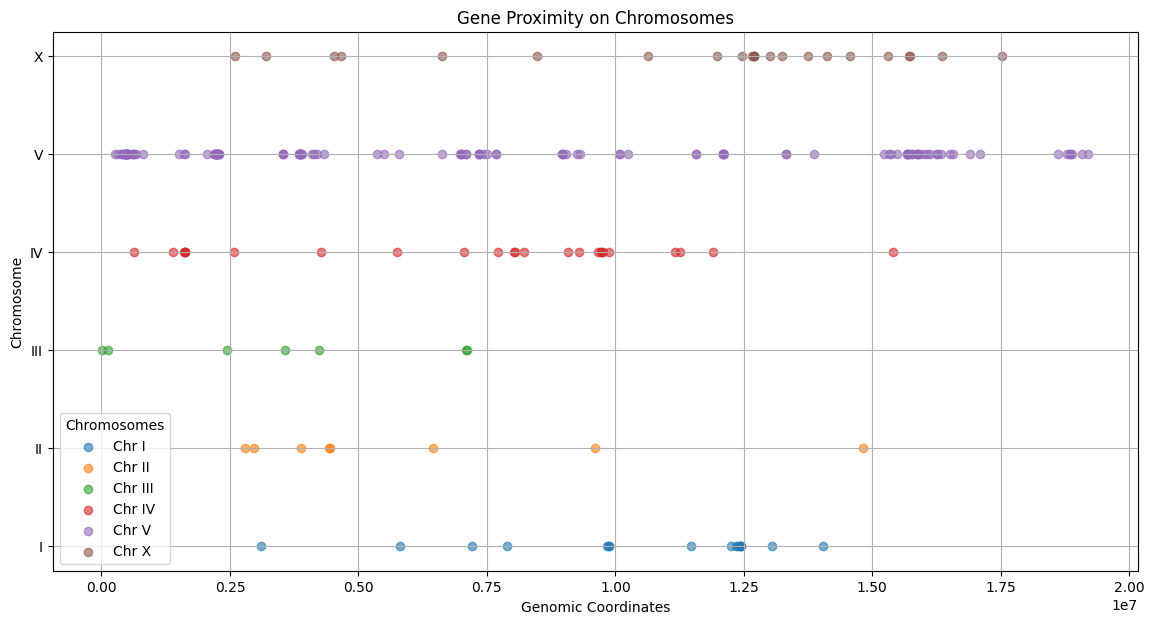


The processed data with proximity labels has been saved to gene_proximity_analysis_with_labels.csv. Downloading now...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload the file
file_path = ('/content/gene_proximity_analysis.csv')
#

# Load the dataset
data = pd.read_csv(file_path)

# Step 2: Load the dataset
# file_name = list()
# data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Data loaded successfully. Here are the first few rows:")
print(data.head())

# Step 3: Data preprocessing
# Ensure genomic coordinates are numeric for sorting and calculating distances
data['genomic_coordinates'] = pd.to_numeric(data['genomic_coordinates'], errors='coerce')

# Drop rows with NaN values in 'genomic_coordinates' or 'chromosome_number'
data.dropna(subset=['genomic_coordinates', 'Chromosomes'], inplace=True)

# Sort the dataset by chromosome number and genomic coordinates
data.sort_values(by=['Chromosomes', 'genomic_coordinates'], inplace=True)

# Step 4: Calculate the distances between consecutive genes on the same chromosome
data['distance_to_next'] = data.groupby('Chromosomes')['genomic_coordinates'].diff().shift(-1)

# Step 5: Label genes as paired (P) or singleton (S)
data['proximity_label'] = 'S'  # Default to singleton

for i in range(len(data) - 1):
    if data.iloc[i]['Chromosomes'] == data.iloc[i + 1]['Chromosomes']:
        data.at[i, 'proximity_label'] = 'P'
        data.at[i + 1, 'proximity_label'] = 'P'

# Ensure the last gene in the list is labeled correctly if paired
if len(data) > 1 and data.iloc[-1]['Chromosomes'] == data.iloc[-2]['Chromosomes']:
    data.at[len(data) - 1, 'proximity_label'] = 'P'

print("\nData with proximity labels:")
print(data[['Symbol', 'Chromosomes', 'genomic_coordinates', 'distance_to_next', 'proximity_label']])

# Step 6: Visualize gene proximity
def plot_gene_proximity(df):
    plt.figure(figsize=(14, 7))
    for chromosome in df['Chromosomes'].unique():
        chr_data = df[df['Chromosomes'] == chromosome]
        plt.scatter(chr_data['genomic_coordinates'], [chromosome]*len(chr_data), label=f'Chr {chromosome}', alpha=0.6)
    plt.xlabel('Genomic Coordinates')
    plt.ylabel('Chromosome')
    plt.title('Gene Proximity on Chromosomes')
    plt.legend(title='Chromosomes')
    plt.grid(True)
    plt.show()

# Plot gene proximity
plot_gene_proximity(data)

# Step 7: Export the results
output_file_name = 'gene_proximity_analysis_with_labels.csv'
data.to_csv(output_file_name, index=False)

# Provide a download link for the generated CSV file
print(f"\nThe processed data with proximity labels has been saved to {output_file_name}. Downloading now...")
files.download(output_file_name)


<ipython-input-1-4c6f282bc6f5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_expression['Cluster'] = clusters


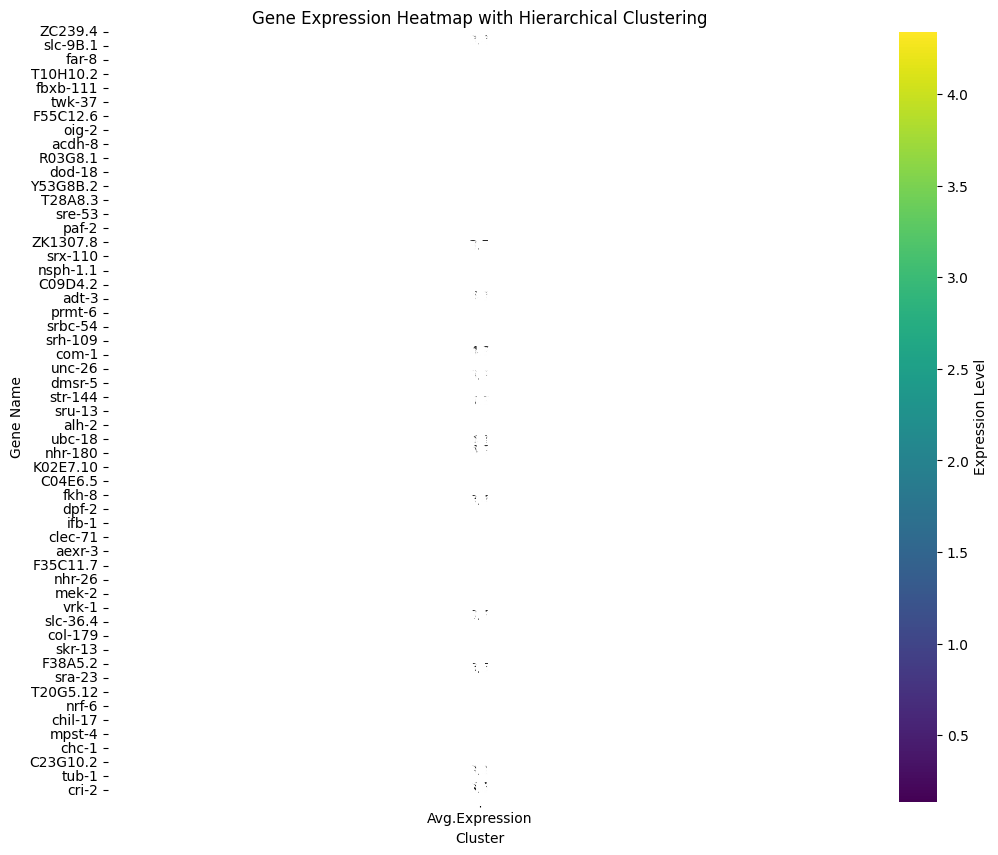

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

# Load the data
file_path = '/content/mdt15_RNAiAvgExpressionValue.xlsx'  # replace with your file path
expression_data = pd.read_excel(file_path)

# Extract relevant data
gene_expression = expression_data[['Gene Name', 'Avg.Expression', 'Pfam ID']]

# Pivot the data
expression_pivot = gene_expression.pivot_table(index='Gene Name', values='Avg.Expression')

# Standardize the data
scaler = StandardScaler()
expression_pivot_scaled = scaler.fit_transform(expression_pivot)

# Perform hierarchical clustering
linked = linkage(expression_pivot_scaled, method='ward')
clusters = fcluster(linked, t=4, criterion='maxclust')

# Add clusters to the original data
gene_expression['Cluster'] = clusters

# Sort by cluster
gene_expression_sorted = gene_expression.sort_values(by='Cluster')

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(expression_pivot.loc[gene_expression_sorted['Gene Name']], cmap='viridis', linewidths=.5, annot=True,
            cbar_kws={'label': 'Expression Level'})
plt.title('Gene Expression Heatmap with Hierarchical Clustering')
plt.xlabel('Cluster')
plt.ylabel('Gene Name')
plt.show()
